In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("white_wine.csv", sep = ";")
# df.drop("No", axis = 1, inplace = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


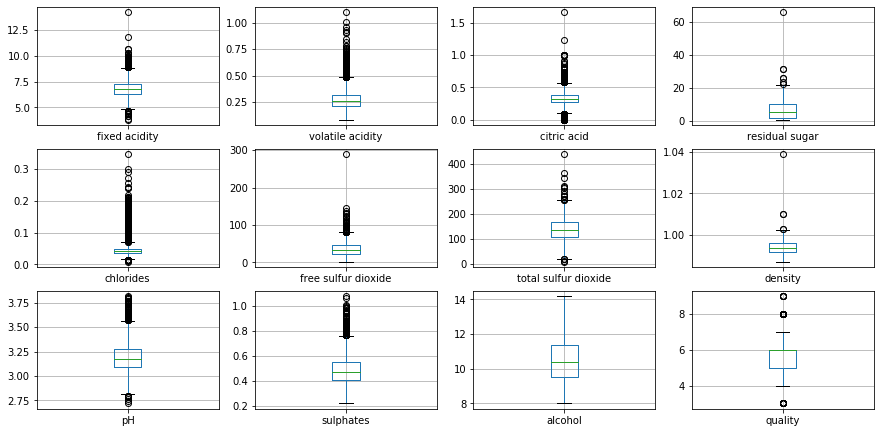

In [5]:
plt.figure(figsize = (15, 10))
numerical = df.columns
for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

In [6]:
for i in range(1, len(numerical)+1):
    
    iqr = df[numerical[i-1]].quantile(0.75) - df[numerical[i-1]].quantile(0.25)
    min_val = df[numerical[i-1]].quantile(0.25) - (iqr * 1.5)
    max_val = df[numerical[i-1]].quantile(0.75) + (iqr * 1.5)
    df[numerical[i-1]] = np.where(df[numerical[i-1]] > max_val, max_val, df[numerical[i-1]])
    df[numerical[i-1]] = np.where(df[numerical[i-1]] < min_val, min_val, df[numerical[i-1]])



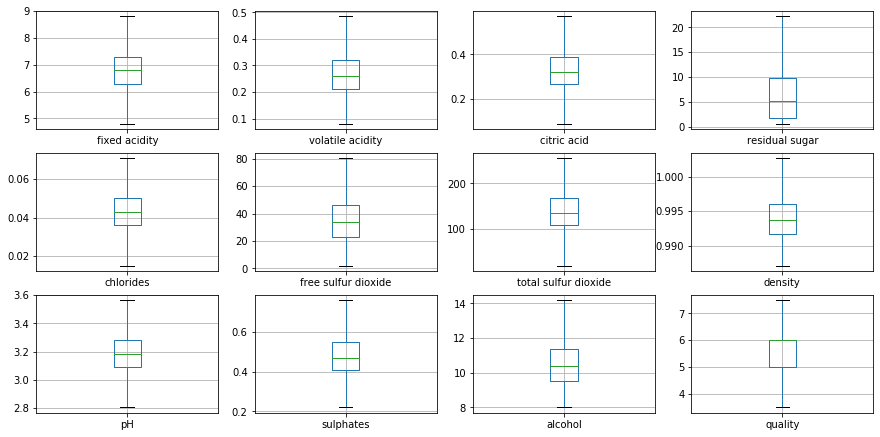

In [7]:
plt.figure(figsize = (15, 10))
numerical = df.columns
for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df.boxplot(column = numerical[i-1])
    # fig.set_title("Pregnancies")

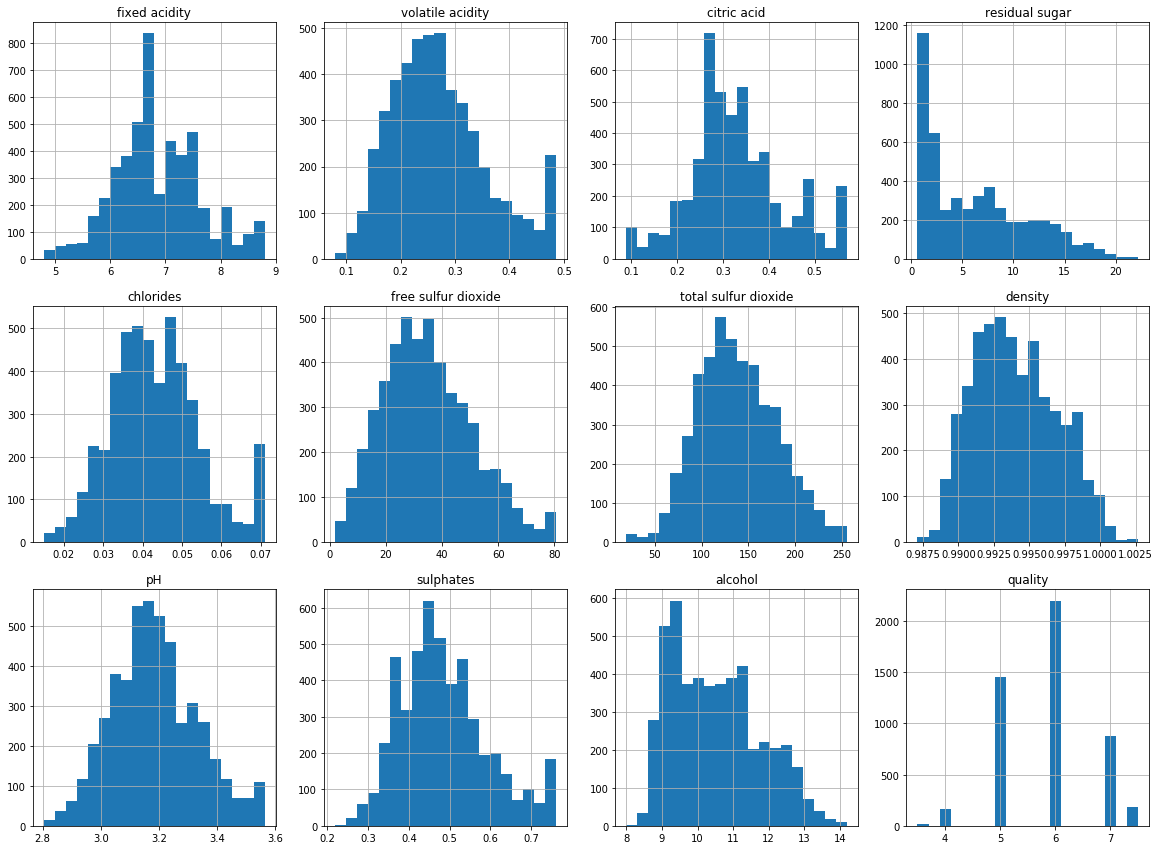

In [8]:
plt.figure(figsize = (20, 20))

for i in range(1, len(numerical)+1):
    plt.subplot(4,4,i)
    fig = df[numerical[i-1]].hist(bins = 20)
    fig.set_title(numerical[i-1])


In [9]:
x = df.drop("quality", axis = 1)
y = df["quality"]

In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
encoder = StandardScaler()
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)


In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
model = RandomForestRegressor(random_state=1234)

In [14]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(xtest)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_pred)

In [17]:
r2_score(ytest, y_pred)

0.4668734938565199

In [18]:
mse ** 0.5

0.6351026592253429

In [19]:
ytrain.unique()

array([6. , 7. , 5. , 7.5, 4. , 3.5])

In [20]:
model.score(xtrain, ytrain)

0.9361521967359698

In [21]:
model.score(xtest, ytest)

0.4668734938565199